In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student-mat.csv', delimiter=';')
df1 = pd.read_csv('student-por.csv', delimiter=';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
#Looking for missing values
print("Initial Missing Values:", df.isnull().sum())

Initial Missing Values: school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [6]:
#Looking for duplicate values
df.duplicated().sum()

0

In [7]:
df1.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [10]:
# Categorical columns 
cat_col = [col for col in df.columns if df[col].dtype == 'object'] 
print('Categorical columns :',cat_col) 
# Numerical columns 
num_col = [col for col in df.columns if df[col].dtype != 'object'] 
print('Numerical columns :',num_col)

Categorical columns : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical columns : ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [11]:
df[cat_col].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [12]:
#Encoding the binary string data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#converting rest of the columns with yes/no data
ColumnsToConvert = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet' ,'romantic']
for column in ColumnsToConvert:
    df[column] = le.fit_transform(df[column])

In [13]:
sampleData = df[['schoolsup','famsup', 'paid', 'activities', 'nursery', 'higher', 'internet' ,'romantic']]
sampleData.tail()

,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
390,0,1,1,0,1,1,0,0
391,0,0,0,0,0,1,1,0
392,0,0,0,0,0,1,0,0
393,0,0,0,0,0,1,1,0
394,0,0,0,0,1,1,1,0


In [14]:
#Encoding columns with varied string data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columnsToConvert = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for column in columnsToConvert:
    df[column] = le.fit_transform(df[column])

In [15]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10
394,1,1,19,1,1,1,1,1,2,0,...,3,2,3,3,3,5,5,8,9,9


In [16]:
cat_col = [col for col in df1.columns if df1[col].dtype == 'object'] 
print('Categorical columns :',cat_col)

Categorical columns : ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [17]:
#Encoding columns with varied string data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columnsToConvert = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for column in columnsToConvert:
    df1[column] = le.fit_transform(df1[column])

In [18]:
df1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


Visualizing the dataset

In [19]:
import seaborn as sns

In [20]:
# Define the mapping dictionaries
school_map = {0: 'GP', 1: 'MS'}
gender_map = {0: 'F', 1: 'M'}

# Group the data by school and gender and get the size of each group
grouped = df.groupby(['school', 'sex']).size()

# Reset the index of the grouped DataFrame and rename the columns
grouped = grouped.reset_index(name='count')

# Replace the encoded values with the original string values
grouped['school'] = grouped['school'].map(school_map)
grouped['sex'] = grouped['sex'].map(gender_map)

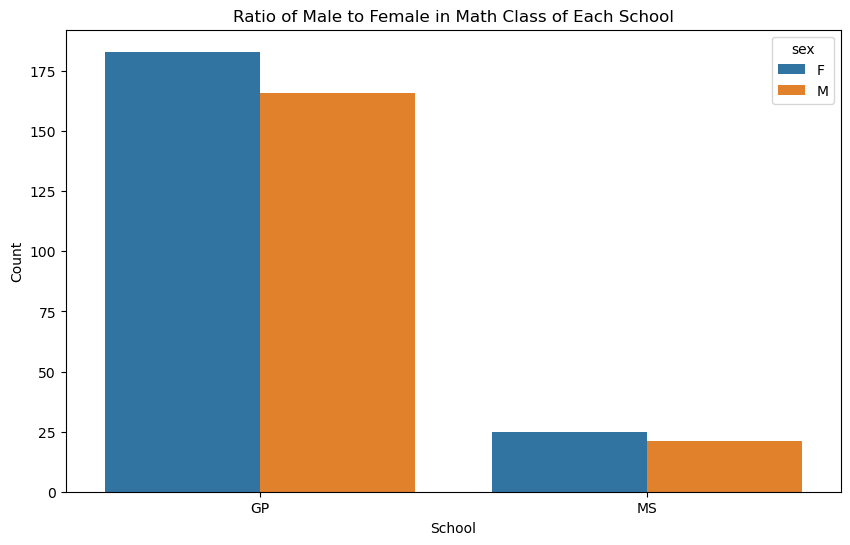

In [26]:
# Create a bar plot
plt.figure(figsize=(10,6))

# Use seaborn to create a grouped bar plot
sns.barplot(x='school', y='count', hue='sex', data=grouped)

# Add labels and title
plt.xlabel('School')
plt.ylabel('Count')
plt.title('Ratio of Male to Female in Math Class of Each School')

# Show the plot
plt.show()


In [22]:
famsize_map = {0: 'LE3', 1: 'GT3'}

grouped_famsize = df.groupby('famsize').size().reset_index(name='count')
grouped_famsize['famsize'] = grouped_famsize['famsize'].map(famsize_map)

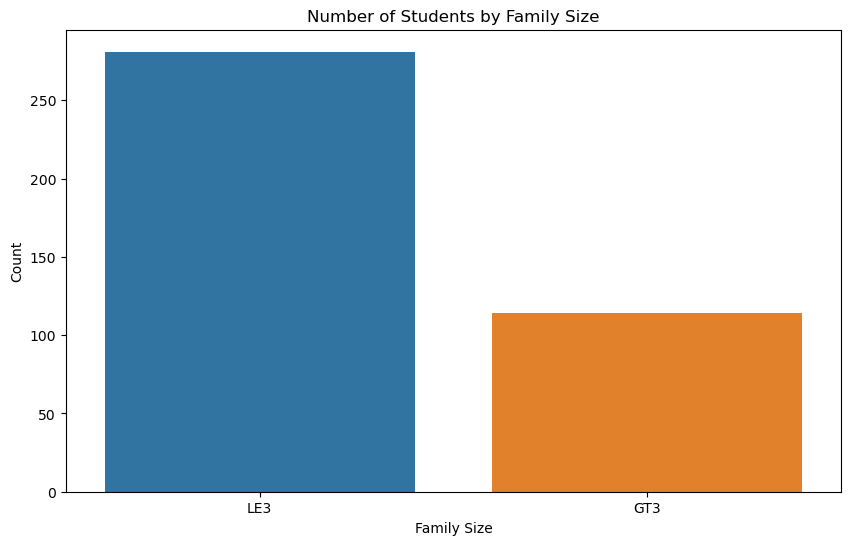

In [23]:
# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='famsize', y='count', data=grouped_famsize)

# Add labels and title
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Number of Students by Family Size')

# Show the plot
plt.show()

In [24]:
#Count the age of students
ageCounts = df['age'].value_counts()

#Create a pie chart
plt.figure(figsize=(8,6))
    plt.pie(ageCounts, labels=ageCounts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of students by age')
plt.show()

IndentationError: unexpected indent (3461634274.py, line 6)

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df['age'])
plt.title("Age Distribution with Outliners")

In [ ]:
walcCounts = df['Walc'].value_counts()

#Create a pie chart
plt.figure(figsize=(8,6))
plt.pie(walcCounts, labels=walcCounts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of weekend alcohol consumption by amount where 1 - very low, 5 - very high')
plt.show()

In [ ]:
address_map = {0: 'R', 1: 'U'}

grouped_address = df.groupby('address').size().reset_index(name='count')
grouped_address['address'] = grouped_address['address'].map(address_map)

In [ ]:
# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='address', y='count', data=grouped_address)

# Add labels and title
plt.xlabel('Address')
plt.ylabel('Count')
plt.title('Number of students residing in Urban or Rural places')

# Show the plot
plt.show()

In [ ]:
corMatrix = sampleData.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corMatrix, annot = True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

In [ ]:
#Create a correlation matrix
corMatrix = df.corr()

#Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()